# This is a code to convert a given quantum circuit into its equivalent circuit graph

This code accepts the quantum circuit as input and then converts it into the equivalent circuit graph.
The circuit is provided as input in a step by step manner, similar to how circuits need to be presented in existing implementations such as qiskit, etc.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import math as math
import numpy as np
import networkx as nx
import networkx.algorithms.approximation as nxi

In [ ]:
def grapher():
    G = nx.Graph()
    gdone=0
    gdict={}
    Dict = {}
    q = int(input("How many qubits does the circuit contain?"))
    for qr in range(q):
        Dict[qr]=qr
    g = int(input("How many gates does the circuit contain?"))
    print("Single qubit gates : X, Y, Z, H")
    print("Multi-qubit gate: CNOT, CZ")
    print("Position of qubits varies from 0 to ", q - 1)
    for gc in range(g):
        gate = input("please choose a gate from the above list")
        if gate == "X":
            gdict[gdone]='X_'+str(gdone)
            gdone=gdone+1
            qubit_serial_number = int(input("On which qubits do you want to perform X?"))
            ei1=Dict[qubit_serial_number]#from dict
            ei2=q+gc#current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number]=q+gc
        elif gate == "Y":
            gdict[gdone]='Y_'+str(gdone)
            gdone=gdone+1
            qubit_serial_number = int(input("On which qubits do you want to perform Y?"))
            ei1=Dict[qubit_serial_number]#from dict
            ei2=q+gc#current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number]=q+gc
        elif gate == "Z":
            gdict[gdone]='Z_'+str(gdone)
            gdone=gdone+1
            qubit_serial_number = int(input("On which qubits do you want to perform Z?"))
            ei1=Dict[qubit_serial_number]#from dict
            ei2=q+gc#current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number]=q+gc
        elif gate == "H":
            gdict[gdone]='H_'+str(gdone)
            gdone=gdone+1
            qubit_serial_number = int(input("On which qubits do you want to perform H?"))
            ei1=Dict[qubit_serial_number]#from dict
            ei2=q+gc#current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number]=q+gc
        elif gate == "CNOT":
            gdict[gdone]='CNOT_'+str(gdone)
            gdone=gdone+1
            print("On which 2 qubits do you want to perform CNOT?")
            qubit_serial_number1 = int(input("Enter serial number for the first qubit"))
            qubit_serial_number2 = int(input("Enter serial number for the second qubit"))
            ei1=Dict[qubit_serial_number1] #from dict
            ei2=q+gc #current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number1]=q+gc
            ei1=Dict[qubit_serial_number2] #from dict
            ei2=q+gc #current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number2]=q+gc
        elif gate == "CZ":
            gdict[gdone]='CZ_'+str(gdone)
            gdone=gdone+1
            print("On which 2 qubits do you want to perform CZ?")
            qubit_serial_number1 = int(input("Enter serial number for the first qubit"))
            qubit_serial_number2 = int(input("Enter serial number for the second qubit"))
            ei1=Dict[qubit_serial_number1] #from dict
            ei2=q+gc #current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number1]=q+gc
            ei1=Dict[qubit_serial_number2] #from dict
            ei2=q+gc #current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number2]=q+gc
        elif gate == "other":
            gname=str(input(print("Enter the name of the gate")))
            gdict[gdone]=gname+'_'+str(gdone)
            gdone=gdone+1
            nofq=int(input(print("Enter the number of qubits this gate acts on")))
            print("Enter the qubit numbers of the "+str(nofq)+" qubits in order")
            qdict={}
            for nofqr in range(nofq):
                qdict[nofqr]=int(input(print("qubit number of the ")))
            for nofqr in range(nofq):
                ei1=Dict[qdict[nofqr]] #from dict
                ei2=q+gc #current gate in consideration q+gc
                G.add_edge(ei1,ei2)
                Dict[qdict[nofqr]]=q+gc
            
    for qr in range(q):
        ei1=Dict[qr] #from dict
        ei2=q+g+qr #current gate in consideration q+gc
        G.add_edge(ei1,ei2)
        
    mapp={}
    for qr in range(q):
        mapp[qr]='i'+str(qr)
        mapp[qr+g+q]='o'+str(qr)
    for gr in range(g):
        mapp[gr+q]=gdict[gr]
    G = nx.relabel_nodes(G, mapp, copy=True)
    return(G)

# Demonstrations on a few  quantum circuits

Let us consider the following circuits. I will try to convert in into the equivalent circuit graphs. 

# 1.

<img src="image2.png">

In [38]:
G=grapher()

How many qubits does the circuit contain?3
How many gates does the circuit contain?1
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT
Position of qubits varies from 0 to  2
please choose a gate from the above listother
Enter the name of the gate
Nonefredkin
Enter the number of qubits this gate acts on
None3
Enter the qubit numbers of the 3qubits
 
None0
 
None1
 
None2


In [53]:
G1=grapher()

How many qubits does the circuit contain?4
How many gates does the circuit contain?9
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  3
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?1
please choose a gate from the above listH
On which qubits do you want to perform H?2
please choose a gate from the above listH
On which qubits do you want to perform H?3
please choose a gate from the above listCZ
On which 2 qubits do you want to perform CZ?
Enter serial number for the first qubit0
Enter serial number for the second qubit1
please choose a gate from the above listCZ
On which 2 qubits do you want to perform CZ?
Enter serial number for the first qubit1
Enter serial number for the second qubit2
please choose a gate from the above listCZ
On which 2 qubits do you want to perform CZ?
Enter serial number for the first qubit2
Enter 

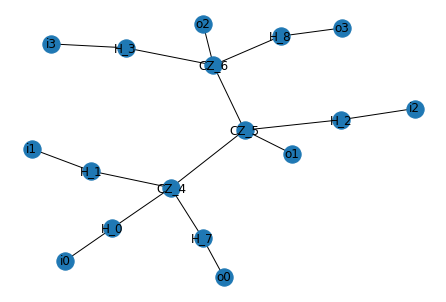

In [54]:
nx.draw(G1, with_labels = True)

# 2.

<img src="image3.png">

In [56]:
G2=grapher()

How many qubits does the circuit contain?6
How many gates does the circuit contain?19
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  5
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?2
please choose a gate from the above listH
On which qubits do you want to perform H?3
please choose a gate from the above listH
On which qubits do you want to perform H?4
please choose a gate from the above listH
On which qubits do you want to perform H?5
please choose a gate from the above listCNOT
On which 2 qubits do you want to perform CNOT?
Enter serial number for the first qubit0
Enter serial number for the second qubit1
please choose a gate from the above listCZ
On which 2 qubits do you want to perform CZ?
Enter serial number for the first qubit2
Enter serial number for the second qubit3
please choose a gate from the above listH
On 

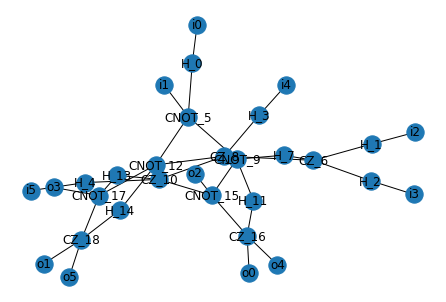

In [57]:
nx.draw(G2, with_labels = True)

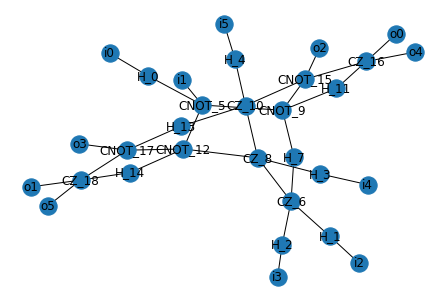

In [60]:
pos=nx.spring_layout(G2)
nx.draw(G2,pos, with_labels = True)

# 3.


<img src="image6.png">

In [29]:
G3=grapher()

How many qubits does the circuit contain?2
How many gates does the circuit contain?2
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  1
please choose a gate from the above listCNOT
On which 2 qubits do you want to perform CNOT?
Enter serial number for the first qubit0
Enter serial number for the second qubit1
please choose a gate from the above listCZ
On which 2 qubits do you want to perform CZ?
Enter serial number for the first qubit1
Enter serial number for the second qubit0


pos3=nx.spring_layout(G3)
edges = G3.edges()
nx.draw(G3,pos3, edges=edges, with_labels = True)



In [113]:
G3d

In [114]:
G3.add_edge('i1', 'CZ_1')

# Treewidth decomposition


In [119]:
(wi,G3d)=nxi.treewidth_min_degree(G3)
wi

2

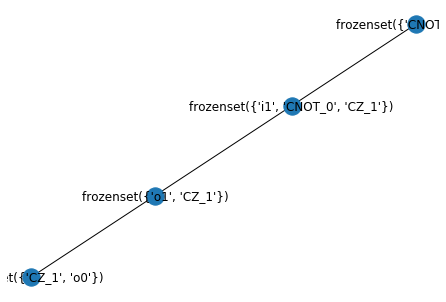

In [117]:
pos3d=nx.spring_layout(G3d)
nx.draw(G3d,pos3d , with_labels = True)


# Proper grapher

In [5]:
def pgrapher():
    G = nx.MultiGraph(strict=False)
    gdone=0
    gdict={}
    Dict = {}
    q = int(input("How many qubits does the circuit contain?"))
    for qr in range(q):
        Dict[qr]=qr
    g = int(input("How many gates does the circuit contain?"))
    print("Single qubit gates : X, Y, Z, H")
    print("Multi-qubit gate: CNOT, CZ")
    print("Position of qubits varies from 0 to ", q - 1)
    for gc in range(g):
        gate = input("please choose a gate from the above list")
        if gate == "X":
            gdict[gdone]='X_'+str(gdone)
            gdone=gdone+1
            qubit_serial_number = int(input("On which qubits do you want to perform X?"))
            ei1=Dict[qubit_serial_number]#from dict
            ei2=q+gc#current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number]=q+gc
        elif gate == "Y":
            gdict[gdone]='Y_'+str(gdone)
            gdone=gdone+1
            qubit_serial_number = int(input("On which qubits do you want to perform Y?"))
            ei1=Dict[qubit_serial_number]#from dict
            ei2=q+gc#current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number]=q+gc
        elif gate == "Z":
            gdict[gdone]='Z_'+str(gdone)
            gdone=gdone+1
            qubit_serial_number = int(input("On which qubits do you want to perform Z?"))
            ei1=Dict[qubit_serial_number]#from dict
            ei2=q+gc#current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number]=q+gc
        elif gate == "H":
            gdict[gdone]='H_'+str(gdone)
            gdone=gdone+1
            qubit_serial_number = int(input("On which qubits do you want to perform H?"))
            ei1=Dict[qubit_serial_number]#from dict
            ei2=q+gc#current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number]=q+gc
        elif gate == "CNOT":
            gdict[gdone]='CNOT_'+str(gdone)
            gdone=gdone+1
            print("On which 2 qubits do you want to perform CNOT?")
            qubit_serial_number1 = int(input("Enter serial number for the first qubit"))
            qubit_serial_number2 = int(input("Enter serial number for the second qubit"))
            ei1=Dict[qubit_serial_number1] #from dict
            ei2=q+gc #current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number1]=q+gc
            ei1=Dict[qubit_serial_number2] #from dict
            ei2=q+gc #current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number2]=q+gc
        elif gate == "CZ":
            gdict[gdone]='CZ_'+str(gdone)
            gdone=gdone+1
            print("On which 2 qubits do you want to perform CZ?")
            qubit_serial_number1 = int(input("Enter serial number for the first qubit"))
            qubit_serial_number2 = int(input("Enter serial number for the second qubit"))
            ei1=Dict[qubit_serial_number1] #from dict
            ei2=q+gc #current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number1]=q+gc
            ei1=Dict[qubit_serial_number2] #from dict
            ei2=q+gc #current gate in consideration q+gc
            G.add_edge(ei1,ei2)
            Dict[qubit_serial_number2]=q+gc
        elif gate == "other":
            gname=str(input(print("Enter the name of the gate")))
            gdict[gdone]=gname+'_'+str(gdone)
            gdone=gdone+1
            nofq=int(input(print("Enter the number of qubits this gate acts on")))
            print("Enter the qubit numbers of the "+str(nofq)+" qubits in order")
            qdict={}
            for nofqr in range(nofq):
                qdict[nofqr]=int(input(print("qubit number of the ")))
            for nofqr in range(nofq):
                ei1=Dict[qdict[nofqr]] #from dict
                ei2=q+gc #current gate in consideration q+gc
                G.add_edge(ei1,ei2)
                Dict[qdict[nofqr]]=q+gc
            
    for qr in range(q):
        ei1=Dict[qr] #from dict
        ei2=q+g+qr #current gate in consideration q+gc
        G.add_edge(ei1,ei2)
        
    mapp={}
    for qr in range(q):
        mapp[qr]='i'+str(qr)
        mapp[qr+g+q]='o'+str(qr)
    for gr in range(g):
        mapp[gr+q]=gdict[gr]
    for mes in range(q):
        ei1=q+g+mes
        ei2=q+g+q+mes
        G.add_edge(ei1,ei2)
        mapp[q+g+q+mes]='m'+str(mes)
    G = nx.relabel_nodes(G, mapp, copy=True)
    return(G)

# Checking the affects on a series of graphs for Grover's search

We are trying to see the change in the treewidth of the graphs obtained from the application of the methods of Grover's search. To understand the changes, we will draw the graph pertaining to various runs of Grover's algorithm and check the changes in the circuit graph and the tree decomposition (in particular, its treewidth)

# 1.

<img src="wq3.png">

In [121]:
Gr=pgrapher()

How many qubits does the circuit contain?3
How many gates does the circuit contain?13
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  2
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?1
please choose a gate from the above listH
On which qubits do you want to perform H?2
please choose a gate from the above listother
Enter the name of the gate
NonebiCNOT
Enter the number of qubits this gate acts on
None3
Enter the qubit numbers of the 3 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None2
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?1
please choose a gate from the above listX
On which qubits do you want to perform X?0
please choose a gate from the above listX

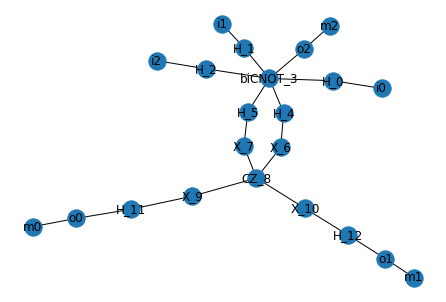

In [123]:
poss=nx.spring_layout(Gr)
edges = Gr.edges()
nx.draw(Gr,poss, edges=edges, with_labels = True)

In [126]:
(wi,Gr1d)=nxi.treewidth_min_degree(nx.Graph(Gr))
wi

2

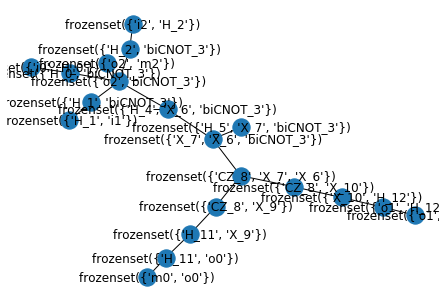

In [127]:
pos4=nx.spring_layout(Gr1d)
edges = Gr1d.edges()
nx.draw(Gr1d,pos4, edges=edges, with_labels = True)

In [130]:
list(Gr1d.nodes())

[frozenset({'H_11', 'o0'}),
 frozenset({'m0', 'o0'}),
 frozenset({'biCNOT_3', 'o2'}),
 frozenset({'m1', 'o1'}),
 frozenset({'H_1', 'i1'}),
 frozenset({'H_1', 'biCNOT_3'}),
 frozenset({'H_11', 'X_9'}),
 frozenset({'X_6', 'X_7', 'biCNOT_3'}),
 frozenset({'H_2', 'biCNOT_3'}),
 frozenset({'H_12', 'o1'}),
 frozenset({'H_4', 'X_6', 'biCNOT_3'}),
 frozenset({'H_2', 'i2'}),
 frozenset({'H_0', 'biCNOT_3'}),
 frozenset({'H_12', 'X_10'}),
 frozenset({'CZ_8', 'X_6', 'X_7'}),
 frozenset({'m2', 'o2'}),
 frozenset({'H_0', 'i0'}),
 frozenset({'CZ_8', 'X_10'}),
 frozenset({'H_5', 'X_7', 'biCNOT_3'}),
 frozenset({'CZ_8', 'X_9'})]

# 2.

<img src="wq4.png">

In [139]:
Gr2=pgrapher()

How many qubits does the circuit contain?4
How many gates does the circuit contain?20
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  3
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?1
please choose a gate from the above listH
On which qubits do you want to perform H?2
please choose a gate from the above listH
On which qubits do you want to perform H?3
please choose a gate from the above listX
On which qubits do you want to perform X?0
please choose a gate from the above listother
Enter the name of the gate
NonetriCNOT
Enter the number of qubits this gate acts on
None4
Enter the qubit numbers of the 4 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None2
qubit number of the 
None3
please choose a gate from the above listX
On which qubits do you want to perform X?0
please choose

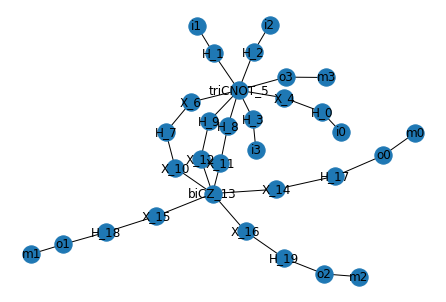

In [140]:
poss=nx.spring_layout(Gr2)
edges = Gr2.edges()
nx.draw(Gr2,poss, edges=edges, with_labels = True)

In [141]:
(wi,Gr2d)=nxi.treewidth_min_degree(nx.Graph(Gr2))
wi

2

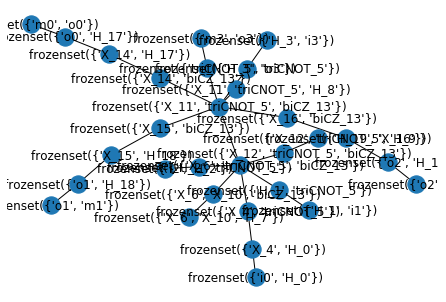

In [142]:
pos4=nx.spring_layout(Gr2d)
edges = Gr2d.edges()
nx.draw(Gr2d,pos4, edges=edges, with_labels = True)

In [137]:
list(Gr2d.nodes())

[frozenset({'X_15', 'biCZ_12'}),
 frozenset({'H_1', 'i1'}),
 frozenset({'H_1', 'triCNOT_5'}),
 frozenset({'X_4', 'triCNOT_5'}),
 frozenset({'H_3', 'i3'}),
 frozenset({'H_19', 'o2'}),
 frozenset({'o3', 'triCNOT_5'}),
 frozenset({'X_13', 'biCZ_12'}),
 frozenset({'X_9', 'biCZ_12', 'triCNOT_5'}),
 frozenset({'H_7', 'X_10', 'triCNOT_5'}),
 frozenset({'H_8', 'X_11', 'triCNOT_5'}),
 frozenset({'H_3', 'triCNOT_5'}),
 frozenset({'H_16', 'X_13'}),
 frozenset({'m3', 'o3'}),
 frozenset({'H_17', 'o1'}),
 frozenset({'H_6', 'X_9', 'triCNOT_5'}),
 frozenset({'m0', 'o0'}),
 frozenset({'H_2', 'triCNOT_5'}),
 frozenset({'X_10', 'biCZ_12', 'triCNOT_5'}),
 frozenset({'H_16', 'o0'}),
 frozenset({'m1', 'o1'}),
 frozenset({'H_0', 'X_4'}),
 frozenset({'H_18', 'H_19'}),
 frozenset({'X_14', 'biCZ_12'}),
 frozenset({'m2', 'o2'}),
 frozenset({'H_0', 'i0'}),
 frozenset({'H_18', 'X_15'}),
 frozenset({'H_2', 'i2'}),
 frozenset({'X_11', 'biCZ_12', 'triCNOT_5'}),
 frozenset({'H_17', 'X_14'})]

# 3.

<img src="wq5.png">

In [143]:
Gr3=pgrapher()

How many qubits does the circuit contain?5
How many gates does the circuit contain?27
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  4
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?1
please choose a gate from the above listH
On which qubits do you want to perform H?2
please choose a gate from the above listH
On which qubits do you want to perform H?3
please choose a gate from the above listH
On which qubits do you want to perform H?4
please choose a gate from the above listX
On which qubits do you want to perform X?0
please choose a gate from the above listX
On which qubits do you want to perform X?1
please choose a gate from the above listother
Enter the name of the gate
NoneqdCNOT
Enter the number of qubits this gate acts on
None5
Enter the qubit numbers of the 5 qubits in order
qubit number of the 
None0
qubit numb

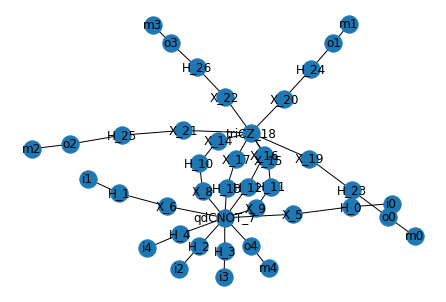

In [144]:
poss=nx.spring_layout(Gr3)
edges = Gr3.edges()
nx.draw(Gr3,poss, edges=edges, with_labels = True)

In [145]:
(wi,Gr3d)=nxi.treewidth_min_degree(nx.Graph(Gr3))
wi

2

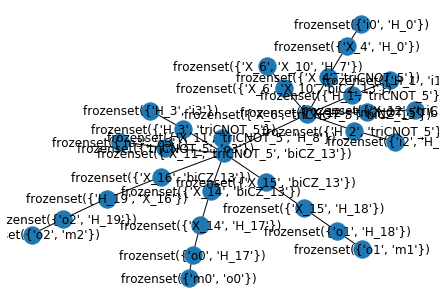

In [146]:
pos4=nx.spring_layout(Gr3d)
edges = Gr3d.edges()
nx.draw(Gr3d,pos4, edges=edges, with_labels = True)

In [147]:
list(Gr3d.nodes())

[frozenset({'X_6', 'biCZ_13', 'triCNOT_5'}),
 frozenset({'H_7', 'X_10', 'X_6'}),
 frozenset({'H_9', 'X_12', 'triCNOT_5'}),
 frozenset({'m0', 'o0'}),
 frozenset({'H_1', 'triCNOT_5'}),
 frozenset({'H_3', 'i3'}),
 frozenset({'H_19', 'o2'}),
 frozenset({'o3', 'triCNOT_5'}),
 frozenset({'H_1', 'i1'}),
 frozenset({'H_2', 'i2'}),
 frozenset({'X_10', 'X_6', 'biCZ_13'}),
 frozenset({'H_19', 'X_16'}),
 frozenset({'H_8', 'X_11', 'triCNOT_5'}),
 frozenset({'H_3', 'triCNOT_5'}),
 frozenset({'X_15', 'biCZ_13'}),
 frozenset({'m3', 'o3'}),
 frozenset({'H_18', 'X_15'}),
 frozenset({'X_4', 'triCNOT_5'}),
 frozenset({'X_11', 'biCZ_13', 'triCNOT_5'}),
 frozenset({'H_18', 'o1'}),
 frozenset({'m1', 'o1'}),
 frozenset({'H_0', 'X_4'}),
 frozenset({'X_16', 'biCZ_13'}),
 frozenset({'H_17', 'o0'}),
 frozenset({'X_14', 'biCZ_13'}),
 frozenset({'m2', 'o2'}),
 frozenset({'H_0', 'i0'}),
 frozenset({'H_2', 'triCNOT_5'}),
 frozenset({'X_12', 'biCZ_13', 'triCNOT_5'}),
 frozenset({'H_17', 'X_14'})]

# 4.


In [7]:
Gr4=pgrapher()

How many qubits does the circuit contain?5
How many gates does the circuit contain?49
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  4
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?1
please choose a gate from the above listH
On which qubits do you want to perform H?2
please choose a gate from the above listH
On which qubits do you want to perform H?3
please choose a gate from the above listH
On which qubits do you want to perform H?4
please choose a gate from the above listX
On which qubits do you want to perform X?0
please choose a gate from the above listX
On which qubits do you want to perform X?1
please choose a gate from the above listother
Enter the name of the gate
NonepCNOT
Enter the number of qubits this gate acts on
None5
Enter the qubit numbers of the 5 qubits in order
qubit number of the 
None0
qubit numbe

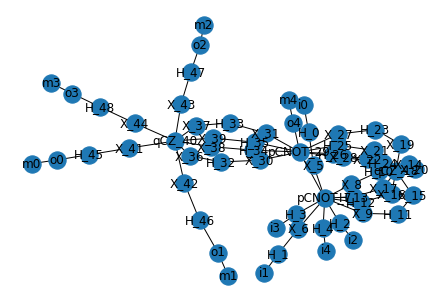

In [8]:
poss=nx.spring_layout(Gr4)
edges = Gr4.edges()
nx.draw(Gr4,poss, edges=edges, with_labels = True)

In [9]:
(wi,Gr4d)=nxi.treewidth_min_degree(nx.Graph(Gr4))
wi

2

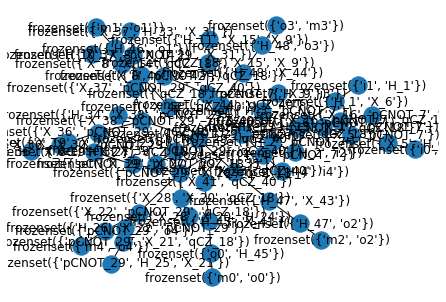

In [10]:
pos4=nx.spring_layout(Gr4d)
edges = Gr4d.edges()
nx.draw(Gr4d,pos4, edges=edges, with_labels = True)

In [11]:
list(Gr4d.nodes())

[frozenset({'X_22', 'pCNOT_29', 'qCZ_18'}),
 frozenset({'X_21', 'pCNOT_29', 'qCZ_18'}),
 frozenset({'pCNOT_29', 'qCZ_40'}),
 frozenset({'H_34', 'X_38', 'pCNOT_29'}),
 frozenset({'X_6', 'pCNOT_7'}),
 frozenset({'H_32', 'X_30', 'X_36'}),
 frozenset({'m3', 'o3'}),
 frozenset({'H_1', 'X_6'}),
 frozenset({'X_20', 'X_28', 'qCZ_18'}),
 frozenset({'pCNOT_29', 'pCNOT_7', 'qCZ_18'}),
 frozenset({'H_3', 'pCNOT_7'}),
 frozenset({'H_48', 'X_44'}),
 frozenset({'H_1', 'i1'}),
 frozenset({'X_36', 'pCNOT_29', 'qCZ_40'}),
 frozenset({'X_9', 'pCNOT_7', 'qCZ_18'}),
 frozenset({'H_3', 'i3'}),
 frozenset({'H_46', 'o1'}),
 frozenset({'X_37', 'pCNOT_29', 'qCZ_40'}),
 frozenset({'X_43', 'qCZ_40'}),
 frozenset({'X_5', 'pCNOT_7'}),
 frozenset({'H_25', 'X_21', 'pCNOT_29'}),
 frozenset({'X_17', 'pCNOT_7', 'qCZ_18'}),
 frozenset({'X_39', 'pCNOT_29', 'qCZ_40'}),
 frozenset({'X_14', 'X_8', 'qCZ_18'}),
 frozenset({'H_48', 'o3'}),
 frozenset({'m4', 'o4'}),
 frozenset({'X_15', 'X_9', 'qCZ_18'}),
 frozenset({'H_11', 'X_1

# Line graph from graph

<img src="wq5.png">

In [6]:
Gra=pgrapher()

How many qubits does the circuit contain?5
How many gates does the circuit contain?27
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  4
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?1
please choose a gate from the above listH
On which qubits do you want to perform H?2
please choose a gate from the above listH
On which qubits do you want to perform H?3
please choose a gate from the above listH
On which qubits do you want to perform H?4
please choose a gate from the above listX
On which qubits do you want to perform X?0
please choose a gate from the above listX
On which qubits do you want to perform X?1
please choose a gate from the above listother
Enter the name of the gate
NonepCNOT
Enter the number of qubits this gate acts on
None5
Enter the qubit numbers of the 5 qubits in order
qubit number of the 
None0
qubit numbe

In [7]:
L=nx.line_graph(Gra)

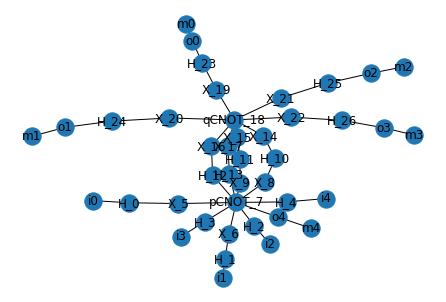

In [9]:
poss=nx.spring_layout(Gra)
edges = Gra.edges()
nx.draw(Gra,poss, edges=edges, with_labels = True)

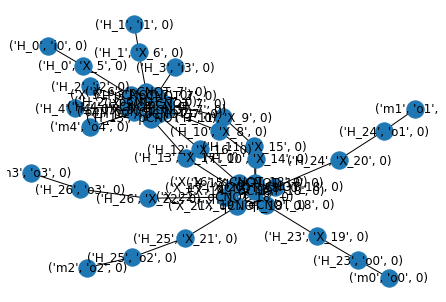

In [10]:
poss=nx.spring_layout(L)
edges = L.edges()
nx.draw(L,poss, edges=edges, with_labels = True)

In [12]:
(wi,Grald)=nxi.treewidth_min_degree(nx.Graph(L))
wi

9

In [14]:
list(Grald.nodes())

[frozenset({('H_25', 'X_21', 0), ('H_25', 'o2', 0)}),
 frozenset({('H_13', 'X_17', 0),
            ('H_13', 'pCNOT_7', 0),
            ('X_17', 'qCNOT_18', 0)}),
 frozenset({('H_26', 'o3', 0), ('m3', 'o3', 0)}),
 frozenset({('m4', 'o4', 0), ('o4', 'pCNOT_7', 0)}),
 frozenset({('H_26', 'X_22', 0), ('H_26', 'o3', 0)}),
 frozenset({('H_23', 'X_19', 0), ('X_19', 'qCNOT_18', 0)}),
 frozenset({('H_12', 'pCNOT_7', 0),
            ('X_16', 'qCNOT_18', 0),
            ('X_17', 'qCNOT_18', 0),
            ('X_8', 'pCNOT_7', 0),
            ('X_9', 'pCNOT_7', 0)}),
 frozenset({('H_24', 'X_20', 0), ('X_20', 'qCNOT_18', 0)}),
 frozenset({('H_25', 'X_21', 0), ('X_21', 'qCNOT_18', 0)}),
 frozenset({('X_15', 'qCNOT_18', 0),
            ('X_16', 'qCNOT_18', 0),
            ('X_17', 'qCNOT_18', 0),
            ('X_8', 'pCNOT_7', 0),
            ('X_9', 'pCNOT_7', 0)}),
 frozenset({('H_2', 'i2', 0), ('H_2', 'pCNOT_7', 0)}),
 frozenset({('H_10', 'X_8', 0),
            ('X_14', 'qCNOT_18', 0),
            

# Investigating replacements of larger gates by multiple smaller gates

# Case 1:


<img src="ima1.png">

In [28]:
Gbig=pgrapher()

How many qubits does the circuit contain?5
How many gates does the circuit contain?1
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  4
please choose a gate from the above listother
Enter the name of the gate
NonepCNOT
Enter the number of qubits this gate acts on
None5
Enter the qubit numbers of the 5 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None2
qubit number of the 
None3
qubit number of the 
None4


In [35]:
Gsmall=pgrapher()

How many qubits does the circuit contain?8
How many gates does the circuit contain?7
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  7
please choose a gate from the above listother
Enter the name of the gate
NonetCNOT
Enter the number of qubits this gate acts on
None3
Enter the qubit numbers of the 3 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None5
please choose a gate from the above listother
Enter the name of the gate
NonetCNOT
Enter the number of qubits this gate acts on
None3
Enter the qubit numbers of the 3 qubits in order
qubit number of the 
None2
qubit number of the 
None5
qubit number of the 
None6
please choose a gate from the above listother
Enter the name of the gate
NonetCNOT
Enter the number of qubits this gate acts on
None3
Enter the qubit numbers of the 3 qubits in order
qubit number of the 
None3
qubit number of the 
None6
qubit number of the 
None7
please choose a gate from

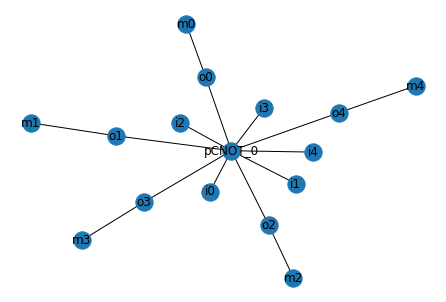

In [30]:
poss=nx.spring_layout(Gbig)
edges = Gbig.edges()
nx.draw(Gbig,poss, edges=edges, with_labels = True)

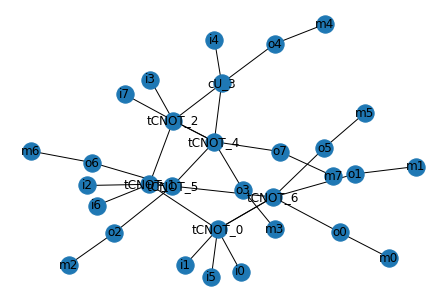

In [36]:
poss=nx.spring_layout(Gsmall)
edges = Gsmall.edges()
nx.draw(Gsmall,poss, edges=edges, with_labels = True)

In [37]:
Lbig=nx.line_graph(Gbig)
Lsmall=nx.line_graph(Gsmall)

In [38]:
(wi,Lbigd)=nxi.treewidth_min_degree(nx.Graph(Lbig))
wi

9

In [39]:
(wi,Lsmalld)=nxi.treewidth_min_degree(nx.Graph(Lsmall))
wi

5

# Case 2:

<img src="imgs.png">

In [42]:
Gb=pgrapher()

How many qubits does the circuit contain?3
How many gates does the circuit contain?1
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  2
please choose a gate from the above listother
Enter the name of the gate
NonetCNOT
Enter the number of qubits this gate acts on
None3
Enter the qubit numbers of the 3 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None2


In [43]:
Gs=pgrapher()

How many qubits does the circuit contain?3
How many gates does the circuit contain?5
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  2
please choose a gate from the above listother
Enter the name of the gate
NonecV
Enter the number of qubits this gate acts on
None2
Enter the qubit numbers of the 2 qubits in order
qubit number of the 
None1
qubit number of the 
None2
please choose a gate from the above listCNOT
On which 2 qubits do you want to perform CNOT?
Enter serial number for the first qubit0
Enter serial number for the second qubit1
please choose a gate from the above listother
Enter the name of the gate
NonecVp
Enter the number of qubits this gate acts on
None2
Enter the qubit numbers of the 2 qubits in order
qubit number of the 
None1
qubit number of the 
None2
please choose a gate from the above listCNOT
On which 2 qubits do you want to perform CNOT?
Enter serial number for the first qubit0
Enter serial number for the second qubit

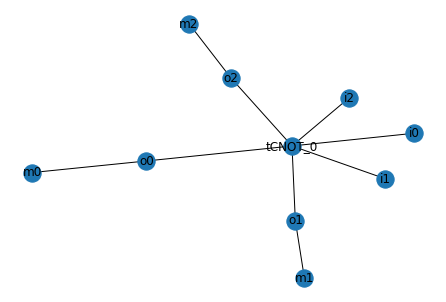

In [44]:
poss=nx.spring_layout(Gb)
edges = Gb.edges()
nx.draw(Gb,poss, edges=edges, with_labels = True)

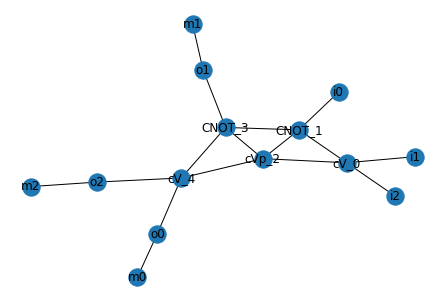

In [45]:
poss=nx.spring_layout(Gs)
edges = Gs.edges()
nx.draw(Gs,poss, edges=edges, with_labels = True)

In [46]:
Lb=nx.line_graph(Gb)

In [47]:
Ls=nx.line_graph(Gs)

In [48]:
(wi,Lbd)=nxi.treewidth_min_degree(nx.Graph(Lb))
wi

5

In [49]:
(wi,Lsd)=nxi.treewidth_min_degree(nx.Graph(Ls))
wi

4

# Case 3:

<img src="img22.png">

In [50]:
Gl=pgrapher()

How many qubits does the circuit contain?3
How many gates does the circuit contain?1
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  2
please choose a gate from the above listother
Enter the name of the gate
NonetCNOT
Enter the number of qubits this gate acts on
None3
Enter the qubit numbers of the 3 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None2


In [51]:
Gs=pgrapher()

How many qubits does the circuit contain?3
How many gates does the circuit contain?7
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  2
please choose a gate from the above listH
On which qubits do you want to perform H?2
please choose a gate from the above listother
Enter the name of the gate
NonecV
Enter the number of qubits this gate acts on
None2
Enter the qubit numbers of the 2 qubits in order
qubit number of the 
None1
qubit number of the 
None2
please choose a gate from the above listCNOT
On which 2 qubits do you want to perform CNOT?
Enter serial number for the first qubit0
Enter serial number for the second qubit1
please choose a gate from the above listother
Enter the name of the gate
NonecVp
Enter the number of qubits this gate acts on
None2
Enter the qubit numbers of the 2 qubits in order
qubit number of the 
None1
qubit number of the 
None2
please choose a gate from the above listCNOT
On which 2 qubits do you want to perform CN

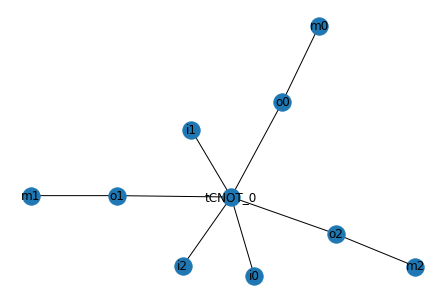

In [52]:
poss=nx.spring_layout(Gl)
edges = Gl.edges()
nx.draw(Gl,poss, edges=edges, with_labels = True)

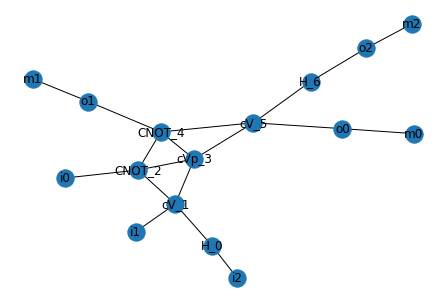

In [53]:
poss=nx.spring_layout(Gs)
edges = Gs.edges()
nx.draw(Gs,poss, edges=edges, with_labels = True)

In [54]:
Ll=nx.line_graph(Gl)
Ls=nx.line_graph(Gs)

In [55]:
(wi,Lld)=nxi.treewidth_min_degree(nx.Graph(Ll))
wi

5

In [56]:
(wi,Lsd)=nxi.treewidth_min_degree(nx.Graph(Ls))
wi

4

# Investigating the effects of removal of all single qubit gates

In the above circuit, we try removing all single qubit gates

# case 1:

<img src="wq5.png">

In [19]:
Grsqr=pgrapher()

How many qubits does the circuit contain?5
How many gates does the circuit contain?2
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  4
please choose a gate from the above listother
Enter the name of the gate
NonepCNOT
Enter the number of qubits this gate acts on
None5
Enter the qubit numbers of the 5 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None2
qubit number of the 
None3
qubit number of the 
None4
please choose a gate from the above listother
Enter the name of the gate
NoneqCZ
Enter the number of qubits this gate acts on
None4
Enter the qubit numbers of the 4 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None2
qubit number of the 
None3


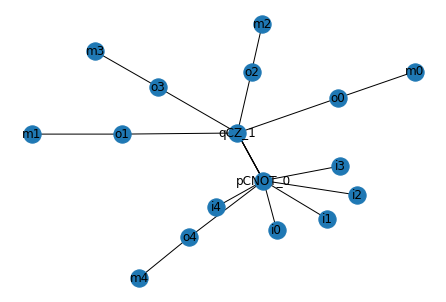

In [21]:
poss=nx.spring_layout(Grsqr)
edges = Grsqr.edges()
nx.draw(Grsqr,poss, edges=edges, with_labels = True)

In [22]:
Lsqr=nx.line_graph(Grsqr)

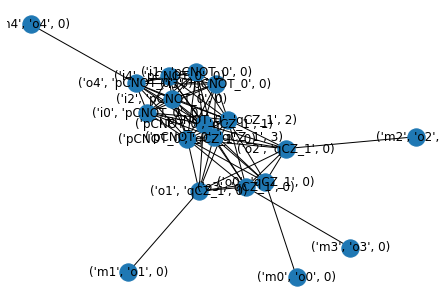

In [23]:
poss=nx.spring_layout(Lsqr)
edges = Lsqr.edges()
nx.draw(Lsqr,poss, edges=edges, with_labels = True)

In [24]:
(wi,Lsqrd)=nxi.treewidth_min_degree(nx.Graph(Lsqr))
wi

9

In [26]:
list(Lsqrd.nodes())

[frozenset({('o2', 'qCZ_1', 0),
            ('o3', 'qCZ_1', 0),
            ('pCNOT_0', 'qCZ_1', 0),
            ('pCNOT_0', 'qCZ_1', 1),
            ('pCNOT_0', 'qCZ_1', 2),
            ('pCNOT_0', 'qCZ_1', 3)}),
 frozenset({('i0', 'pCNOT_0', 0),
            ('i1', 'pCNOT_0', 0),
            ('i2', 'pCNOT_0', 0),
            ('i3', 'pCNOT_0', 0),
            ('i4', 'pCNOT_0', 0),
            ('o4', 'pCNOT_0', 0),
            ('pCNOT_0', 'qCZ_1', 0),
            ('pCNOT_0', 'qCZ_1', 1),
            ('pCNOT_0', 'qCZ_1', 2),
            ('pCNOT_0', 'qCZ_1', 3)}),
 frozenset({('o1', 'qCZ_1', 0),
            ('o2', 'qCZ_1', 0),
            ('o3', 'qCZ_1', 0),
            ('pCNOT_0', 'qCZ_1', 0),
            ('pCNOT_0', 'qCZ_1', 1),
            ('pCNOT_0', 'qCZ_1', 2),
            ('pCNOT_0', 'qCZ_1', 3)}),
 frozenset({('m4', 'o4', 0), ('o4', 'pCNOT_0', 0)}),
 frozenset({('m1', 'o1', 0), ('o1', 'qCZ_1', 0)}),
 frozenset({('m2', 'o2', 0), ('o2', 'qCZ_1', 0)}),
 frozenset({('o0', 'qCZ_1', 0),

# Case 2:

<img src="wq3.png">

In [58]:
Gwith=pgrapher()

How many qubits does the circuit contain?3
How many gates does the circuit contain?13
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  2
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?1
please choose a gate from the above listH
On which qubits do you want to perform H?2
please choose a gate from the above listother
Enter the name of the gate
NonetCNOT
Enter the number of qubits this gate acts on
None3
Enter the qubit numbers of the 3 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None2
please choose a gate from the above listH
On which qubits do you want to perform H?0
please choose a gate from the above listH
On which qubits do you want to perform H?1
please choose a gate from the above listX
On which qubits do you want to perform X?0
please choose a gate from the above listX


In [59]:
Gwithout=pgrapher()

How many qubits does the circuit contain?3
How many gates does the circuit contain?2
Single qubit gates : X, Y, Z, H
Multi-qubit gate: CNOT, CZ
Position of qubits varies from 0 to  2
please choose a gate from the above listother
Enter the name of the gate
NonetCNOT
Enter the number of qubits this gate acts on
None3
Enter the qubit numbers of the 3 qubits in order
qubit number of the 
None0
qubit number of the 
None1
qubit number of the 
None2
please choose a gate from the above listCZ
On which 2 qubits do you want to perform CZ?
Enter serial number for the first qubit0
Enter serial number for the second qubit1


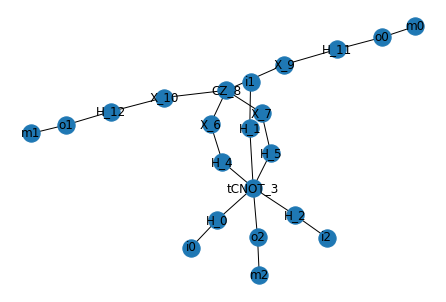

In [60]:
poss=nx.spring_layout(Gwith)
edges = Gwith.edges()
nx.draw(Gwith,poss, edges=edges, with_labels = True)

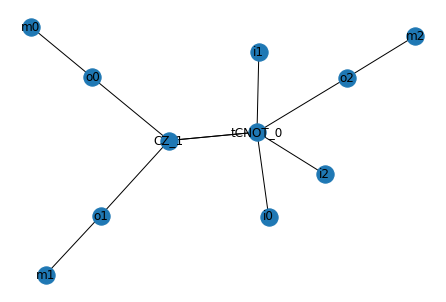

In [61]:
poss=nx.spring_layout(Gwithout)
edges = Gwithout.edges()
nx.draw(Gwithout,poss, edges=edges, with_labels = True)

In [62]:
Lwith=nx.line_graph(Gwith)
Lwithout=nx.line_graph(Gwithout)

In [63]:
(wi,Lwithd)=nxi.treewidth_min_degree(nx.Graph(Lwith))
wi

5

In [64]:
(wi,Lwithout)=nxi.treewidth_min_degree(nx.Graph(Lwithout))
wi

5